In [1]:
# データ準備
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline
# アヤメ品種データの読み込み
from sklearn.datasets import load_iris

iris_data = load_iris()

# 説明変数
X_array = iris_data.data
# カラムデータを取得
X0=X_array[:,0]
X1=X_array[:,3]

# 目的変数
t_array = iris_data.target
T=t_array

N=len(X0)
petal_data=npy.zeros((N,2))
T3 = npy.zeros((N,3), dtype=npy.uint8)

#データの設定
for i in range(N):
    petal_data[i]=[X0[i], X1[i]]
    if T[i] == 0:
        T3[i]=[1,0,0]
    elif T[i] == 1:
        T3[i]=[0,1,0]
    else:
        T3[i]=[0,0,1]

X_range0=[min(X0)*0.9,max(X0)*1.1]
X_range1=[min(X1)*0.9,max(X1)*1.1]

# データをclassdata3.npzファイルに保存する
npy.savez('neural_rawdata.npz',X=petal_data,T3=T3,X_range0=X_range0,X_range1=X_range1,X_n=N)


In [2]:
# 生データファイルから取り出す
sample_data = npy.load('neural_rawdata.npz')
# 入力値の設定
X=sample_data['X']
# がく片の長さの表示範囲設定
X_range0=sample_data['X_range0']
# がく片の幅の表示範囲設定
X_range1=sample_data['X_range1']
# クラス（答え）の設定
T3=sample_data['T3']

# 訓練データとテストデータに分割する
X_test=npy.r_[X[:25,:],X[50:75,:],X[100:125,:]]
X_train=npy.r_[X[25:50,:],X[75:100,:],X[125:150,:]]
T_test=npy.r_[T3[:25,:],T3[50:75,:],T3[100:125,:]]
T_train=npy.r_[T3[25:50,:],T3[75:100,:],T3[125:150,:]]
X_col = ['cornflowerblue','black','white']

npy.savez('unsu_data.npz',X_train=X_train, T_train=T_train,X_test=X_test,T_test=T_test,X_range0=X_range0,X_range1=X_range1,X_col=X_col)

In [3]:
import math
# ファイルデータから取り出す
file_data = npy.load('unsu_data.npz')

# 入力値の設定
X=file_data['X_train']
# がく片の長さの表示範囲設定
X_range0=file_data['X_range0']
X_range0[0]=math.floor(X_range0[0])
X_range0[1]=math.ceil(X_range0[1])
# がく片の幅の表示範囲設定
X_range1=file_data['X_range1']
X_range1[0]=math.floor(X_range1[0])
X_range1[1]=math.ceil(X_range1[1])
# カラムの色情報設定
X_col = file_data['X_col']

N=len(X)
K=3

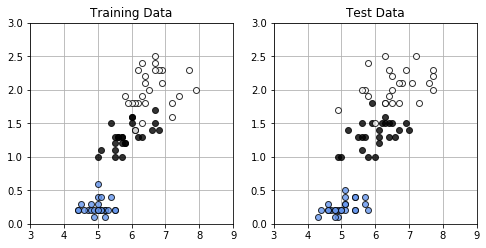

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# データの表示
def Show_data(x,t):
    wk,n=t.shape
    for i in range(n):
        plt.plot(x[t[:,i]==1,0],x[t[:,i]==1,1],linestyle='none',marker='o',markeredgecolor='black',color=X_col[i],alpha=0.8)
    plt.grid(True)

plt.figure(1,figsize=(8,3.7))
plt.subplot(1,2,1)
Show_data(X_train,T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1,2,2)
Show_data(X_test,T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')

plt.show()

In [9]:
# 変数の準備と初期化
# 中心ベクトルの初期値
Mu = npy.array([[5,0.5],[5,1],[5,2]])
# クラス指示変数の初期値
R = npy.c_[npy.ones((N,1),dtype=int),npy.zeros((N,2),dtype=int)]



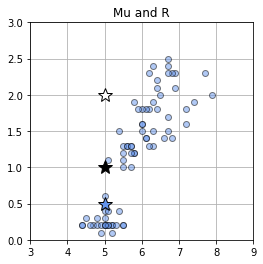

In [6]:
def show_prm(x,r,mu,col):
    for k in range(K):
        # データ分布の表示
        plt.plot(x[r[:,k] == 1,0], x[r[:,k] == 1,1],marker='o',markerfacecolor=X_col[k],
                markeredgecolor='k',markersize=6,alpha=0.5,linestyle='none')
        plt.plot(mu[k,0],mu[k,1],marker='*',markerfacecolor=X_col[k],
                markersize=15,markeredgecolor='k',markeredgewidth=1)
        plt.xlim(X_range0)
        plt.ylim(X_range1)
        plt.grid(True)

plt.figure(figsize=(4,4))
R = npy.c_[npy.ones((N,1)),npy.zeros((N,2))]
show_prm(X,R,Mu,X_col)

plt.title('Mu and R')
plt.show()

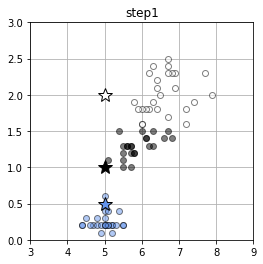

In [13]:
# rの更新
def step1_kmeans(x0,x1,mu):
    N = len(x0)
    r = npy.zeros((N,K))
    for n in range(N):
        wk = npy.zeros(K)
        for k in range(K):
            # 各プロットと各中心ベクトルとの距離を算出
            wk[k] = (x0[n]-mu[k,0])**2 + (x1[n]-mu[k,1])**2
        # 最小値となるクラスターに所属させる
        r[n,npy.argmin(wk)]=1
    return r

plt.figure(figsize=(4,4))
R = step1_kmeans(X[:,0],X[:,1],Mu)
show_prm(X,R,Mu,X_col)
plt.title('step1')
plt.show()

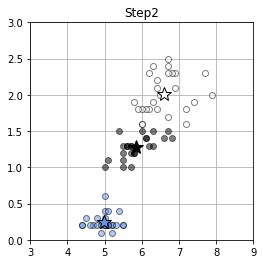

In [15]:
# 中心ベクトルμの更新
def step2_kmeans(x0,x1,r):
    mu=npy.zeros((K,2))
    for k in range(K):
        # x0とx1の平均を算出
        mu[k,0]=npy.sum(r[:,k]*x0)/npy.sum(r[:,k])
        mu[k,1]=npy.sum(r[:,k]*x1)/npy.sum(r[:,k])
    return mu

# 処理
plt.figure(figsize=(4,4))
mu=step2_kmeans(X[:,0],X[:,1],R)
show_prm(X,R,mu,X_col)
plt.title('Step2')
plt.show()

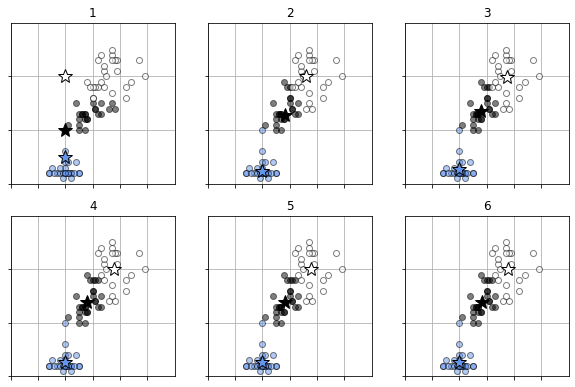

In [16]:
plt.figure(1,figsize=(10,6.5))
max_it=6

for it in range(0,max_it):
    plt.subplot(2,3,it+1)
    R=step1_kmeans(X[:,0],X[:,1],Mu)
    show_prm(X,R,Mu,X_col)
    plt.title("{0:d}".format(it+1))
    plt.xticks(range(int(X_range0[0]),int(X_range0[1])), "")
    plt.yticks(range(int(X_range1[0]),int(X_range1[1])), "")
    Mu=step2_kmeans(X[:,0],X[:,1],R)

plt.show()


In [56]:
# 正解データ=T3
#クラスタリング結果=R

anslist=npy.r_[T3[25:50,:],T3[75:100,:],T3[125:150,:]]

i = 0
correct_rate = []
for answer in anslist:
    correct_rate.append((R[i] == answer).all())
    i = i + 1

print(correct_rate.count(True)/len(correct_rate))


0.84


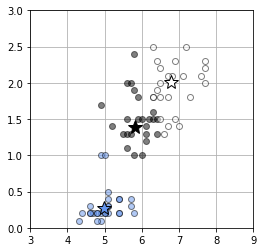

In [67]:
plt.figure(figsize=(4,4))
R2=step1_kmeans(X_test[:,0],X_test[:,1],Mu)
show_prm(X_test,R2,Mu,X_col)


In [68]:
anslist2=npy.r_[T3[25:50,:],T3[75:100,:],T3[125:150,:]]

i = 0
correct_rate2 = []
for answer in anslist2:
    correct_rate2.append((R2[i] == answer).all())
    i = i + 1

print(correct_rate2.count(True)/len(correct_rate2))

0.8266666666666667
